# Assignment 3

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Import different modules for using with the notebook
import numpy as np
import scipy as sc
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

from numpy.random import randint
from skimage import io
from ipywidgets import interact
from matplotlib.patches import Ellipse

# Do it yourself

You will be asked to implement K-means and GMM yourself in this section.

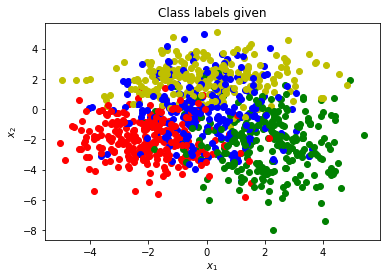

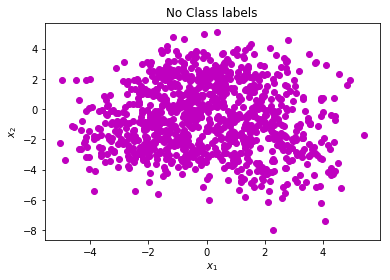

In [3]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=4, size = N)
c = np.array(["r","g","b","y","c","m"])
# Mean of each cluster
means_new = np.array([[-2, -2], [2, -2], [0 , 0], [0 , 2]])
# Covariance (in X and Y direction) of each cluster
covariances_new = np.random.random_sample((2, 4)) + 1
# Dimensions of each point
X_new = np.vstack([np.random.randn(N)*covariances_new[0, y] + means_new.T[0, y],
               np.random.randn(N)*covariances_new[1, y] + means_new.T[1, y]])

for k in range(X_new.shape[1]):
    plt.plot(X_new[0,k],X_new[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X_new.shape[1]):
    plt.plot(X_new[0,k],X_new[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data

## Generate Random Data

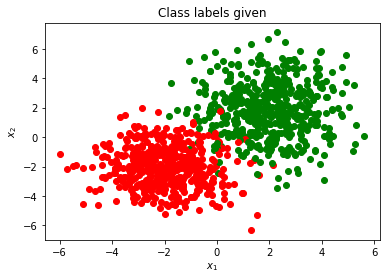

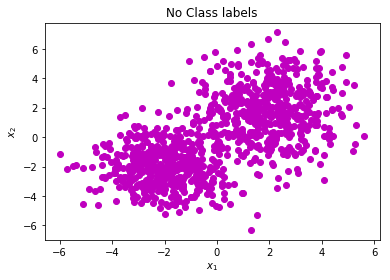

In [4]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
c = np.array(["r","g","b","y","c"])
# Mean of each cluster
means = np.array([[-2, 2], [-2, 2],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Class labels given")
plt.show()

for k in range(X.shape[1]):
    plt.plot(X[0,k],X[1,k],"m"+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("No Class labels")
plt.show()

# Plot the data

## K-means

Please write a generic python function (in a separate package) which implements a generic version of the K-means algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the means of your K-clusters and the assigned labels of your dataset (use 1-of-K coding to represent your labels). Initialize your means with two random samples.

**Use your newly created function to assign labels to the random dataset we generated above. Plot the data and their newly assigned labels. Also plot the mean of the two clusters. Your generated plot should resemble the following:**

# Own Kmeans


Counter =  0


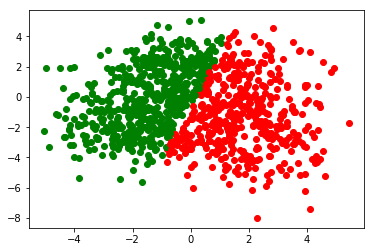

Counter =  1


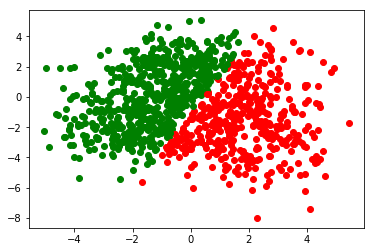

Counter =  2


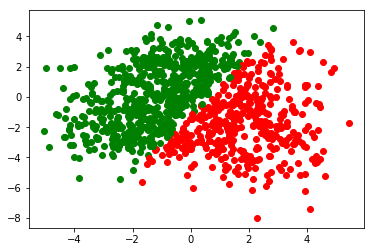

Counter =  3


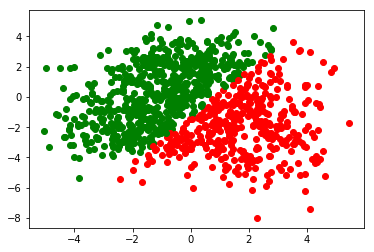

Counter =  4


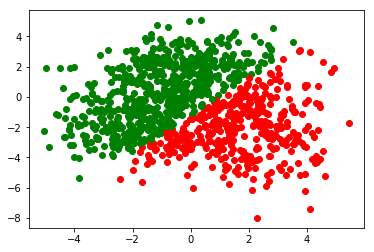

Counter =  5


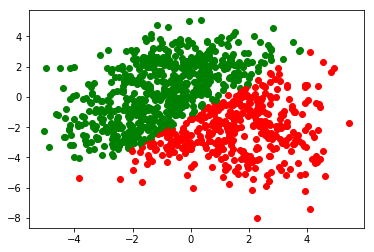

Counter =  6


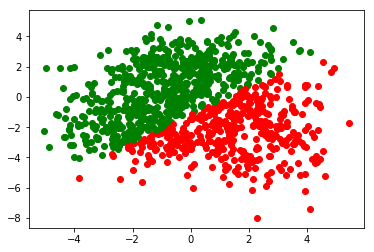

Counter =  7


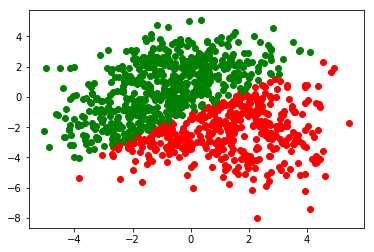

Counter =  8


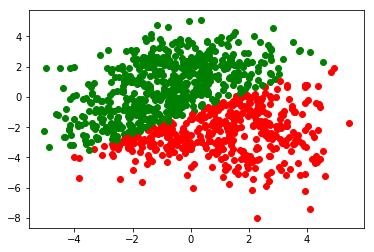

Counter =  9


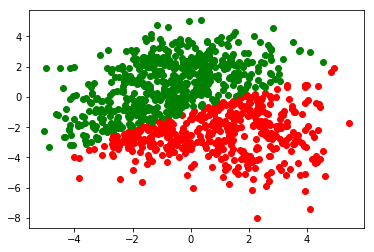

Counter =  10


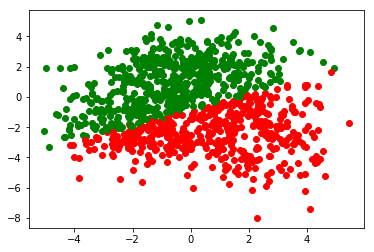

Counter =  11


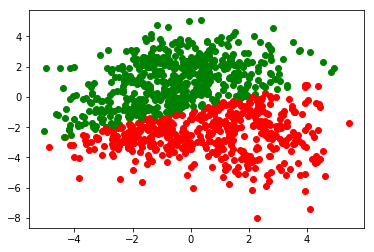

Counter =  12


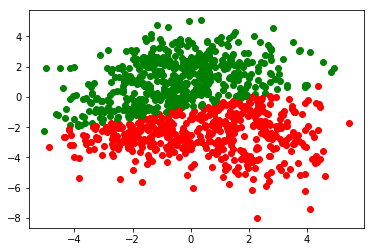

Counter =  13


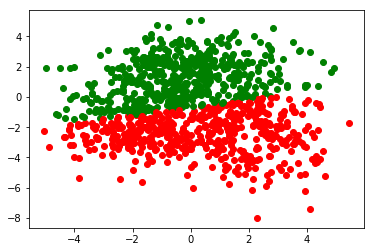

Counter =  14


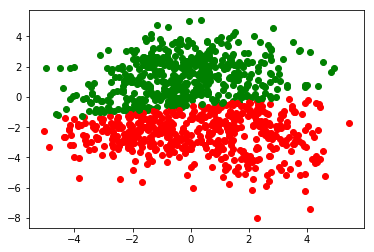

Counter =  15


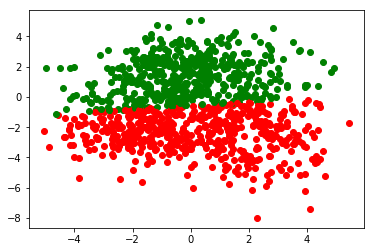

Counter =  16


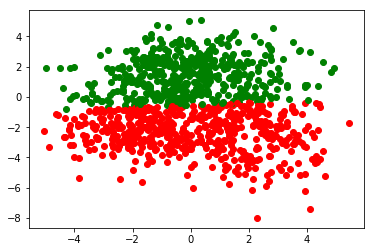

Counter =  17


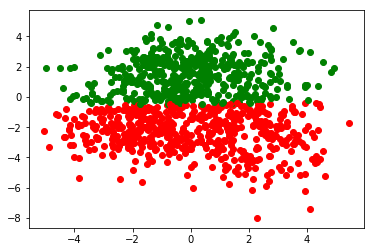

Counter =  18


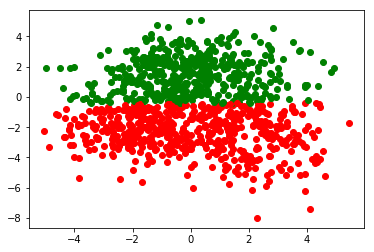

Counter =  19


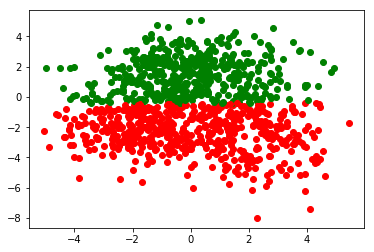

In [11]:
def Kmeans(X, k):
    # Generating a random startpoint, two cluster center points - Choose two random samples
    c = np.array(["r","g","b","y","c"])
    
    N=X.shape[1]
    d=X.shape[0]
    
    start_X_ind = np.random.randint(low=0, high=N, size = (k,d))
    #Mean = X[:,start_X_ind]
    Mean = np.zeros((k,d))

    #print(start_X_ind)
    for i in range(k):
        for j in range(d):
            Mean[i,j] = X[j,start_X_ind[i,j]]
    
    #Class labels
    label_ass = np.zeros(N,dtype=int) 
    
    #Perform 5 iterations of K-means
    runs = 1
    counter = 0
    d = np.zeros((k,N))
    while (runs == 1):
    #for counter in range(5):
        #Calculate Distances to cluster points
        for i in range(k):
            for j in range(N):           #all rows (dimensions), throgh N observations columns, - Means through k rows 
                d[i,j] = np.sqrt(np.sum((X[:,j]-Mean[i,:])**2))                                   # and all columns
                        
        #Assign a label to each observation depending to which cluster center it is the closest to

        label_ass = np.argmin(d, axis = 0)
        
        Mean_old = np.copy(Mean)
        
        #Calculate new cluster points; mean of all points belonging to the same cluster
        
        for i in range(k):
            Mean[i] = np.mean(X.T[label_ass == i], axis = 0)
            
        #Plot result
        
        print("Counter = ",counter)
        if counter%1 == 0:
            for i in range(N):
                plt.plot(X[0,i],X[1,i],c[label_ass[i]]+"o")
        counter+=1
        
        #Square old center star new center  
        #print(Mean)
        #print(Mean_old)
        if (np.sqrt(np.sum((Mean-Mean_old)**2)) < 1e-2):
            runs =0
            
            
        plt.show()
    
Kmeans(X_new,2)
  

### display(Image(filename='./kmeans.jpg'))

$x_1$ is on the $x$-axis and $x_2$ is on the $y$-axis.

## GMM

Please write a generic python function (in a separate package) which implements a generic version of the Gaussian Mixture Models algorithm. Your function should take as input a $d$-dimensional data set and the number of clusters into which you wish to group your data set. Return the number of members, the means and covariances of your K-clusters. Also return the responsibilites of your observations (of every sample in your dataset). Use your K-means function to intialize your GMM.

**Use your newly created function to cluster the above generated data set. Plot the 95% confidence
interval of your data and use the responsibility of each data point to set the color of each sample.
Your generated plot should resemble the following:**

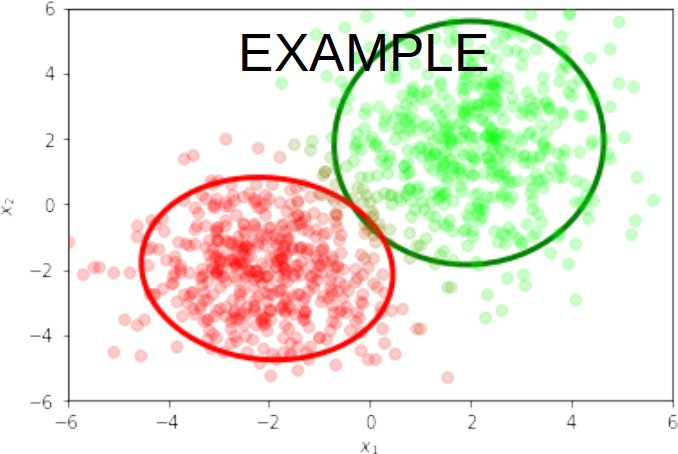

In [6]:
display(Image(filename='./gmm.jpg'))

# Kmeans for GMM

In [7]:
def KforG(X, k):
    # Generating a random startpoint, two cluster center points - Choose two random samples
    c = np.array(["r","g","b","y","c"])
    
    N=X.shape[1]
    d=X.shape[0]
    
    start_X_ind = np.random.randint(low=0, high=N, size = (k,d))
    #Mean = X[:,start_X_ind]
    Mean = np.zeros((k,d))

    for i in range(k):
        for j in range(d):
            Mean[i,j] = X[j,start_X_ind[i,j]]
    
    #Class labels
    label_ass = np.zeros(N,dtype=int) 
    
    #Perform 5 iterations of K-means
    runs = 1
    counter = 0
    d = np.zeros((k,N))
    while (runs == 1):
    #for counter in range(5):
        #Calculate Distances to cluster points
        for i in range(k):
            for j in range(N):           #all rows (dimensions), throgh N observations columns, - Means through k rows 
                d[i,j] = np.sqrt(np.sum((X[:,j]-Mean[i,:])**2))                                   # and all columns
                        
        #Assign a label to each observation depending to which cluster center it is the closest to

        label_ass = np.argmin(d, axis = 0)
        
        Mean_old = np.copy(Mean)
        
        #Calculate new cluster points; mean of all points belonging to the same cluster
        
        for i in range(k):
            Mean[i] = np.mean(X.T[label_ass == i], axis = 0)
            
        #Plot result
        
        counter+=1
        if (np.sqrt(np.sum((Mean-Mean_old)**2)) < 1e-2):
            runs =0
        
    cov = []
    nj = []
    for j in range(k):
        cov.append(np.cov(X[:,j==label_ass]))
        nj.append((X[:,j==label_ass]).shape[1])
        
        #Square old center star new center  
        #print(Mean)
        #print(Mean_old)
        
            
    return(Mean,np.array(cov),np.array(nj))  
    

# GMM


In [8]:
def myGMM(X,k):
    means, covs, njs = KforG(X,k)
    N=X.shape[1]
    d=X.shape[0]
    label_ass = np.zeros(N,dtype=int)
    probs = np.zeros((k,N))
    
    for i in range(k): #Prior prob * gaussian dists
        probs[i] = (njs[i]/N)*sc.stats.multivariate_normal.pdf(X.T, means[i], covs[i])
    
    label_ass = np.argmax(probs, axis=0) 
    for j in range(k):  #new means
        means[j] = np.mean(X.T[label_ass==j], axis=0)
        covs[j] = np.cov(X[:,j==label_ass])
    
    c = np.array(["r","g","b","c","y", "m"])
    fig = plt.figure()
    axis = fig.add_subplot(111)
    
    for j in range(N):
        col = c[label_ass[j]]
        axis.scatter(X[0,j],X[1,j],c=col, zorder=1, alpha=0.4)
        
        
    eigvals, eigvecs = np.linalg.eig(covs)
    eigvals = np.sqrt(eigvals)
    for i in range(covs.shape[0]):
        ell = Ellipse(
            xy=(means[i]), 
            width=eigvals[i,0]*4, 
            height=eigvals[i,1]*4, 
            angle=-np.rad2deg(np.arccos(eigvecs[i]))[0,0],
            facecolor='None', 
            edgecolor=c[i]
        )
        axis.add_patch(ell) 
    plt.show()    

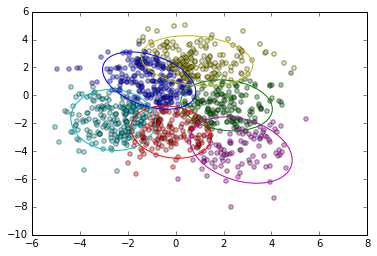

In [9]:
myGMM(X_new,6)



# Perform K-means on an image

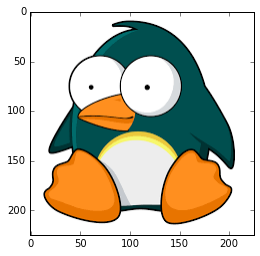

In [10]:
im = io.imread('./cartoon.png')
plt.imshow(im/np.max(im))
plt.show()

In [11]:
# Define function to recreate the image (Code exactly from tutorial)
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image
# Read in cartoon
cartoon = io.imread('./cartoon.png')

# Convert cartoon to normalised np array
cartoon = np.array(cartoon, dtype=np.uint8) / 255

# Get cartoon dimentions (width, height, channels/depth)
w, h, d = original_shape = tuple(cartoon.shape)

# Flatten the width and height while preserving the depth
flat_cartoon = cartoon.reshape((w * h, d))
# function that uses kmeans to do vector quantization - displays output
def image_vec_quantize(n_vec, flat_image, return_image=False):
    # Create and fit Kmeans model
    model = KMeans(n_clusters=n_vec, init='k-means++',
                   n_init=(5-np.int(np.log(n_vec))))
    means = model.fit(flat_image)

    # Predict new colors for image (may only be one of means)
    new_colors = means.predict(flat_image)

    # Create new cartoon using the function above and the new means
    new_image = recreate_image(means.cluster_centers_, new_colors, w, h)
    
    if(return_image):
        return new_image
    else:
         # Display the new image
        plt.figure()
        plt.title('Reconstruction using %d colors' % n_vec)
        plt.imshow(new_image)
        plt.show()

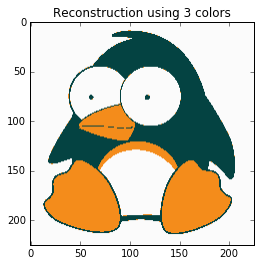

In [12]:
image_vec_quantize(3, flat_cartoon)

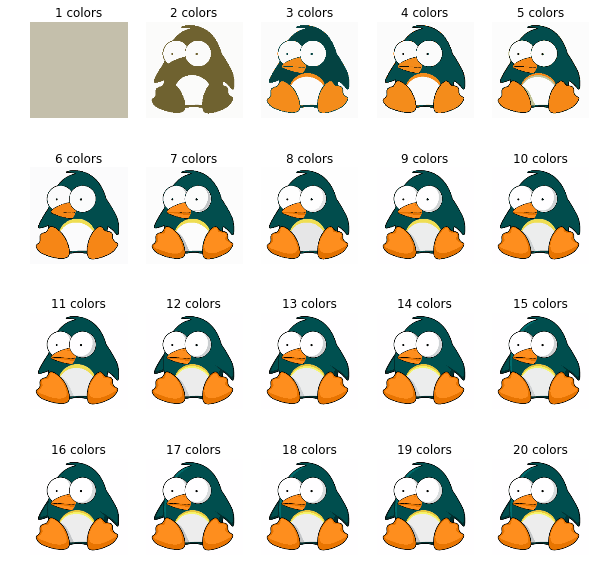

In [13]:
#Reconstruction 
# create a series of reconstructions with a different number of colors
n_cartoons = 20
n_colors = 20
n_cols = np.linspace(1, n_colors, n_cartoons).astype(int)
cartoons = [
    image_vec_quantize(n_col, flat_cartoon, True)
    for n_col in n_cols
]

# Plot these reconstructions
fig = plt.figure(figsize=(10, np.ceil(n_cols.size/2)))
count = 0
for i in n_cols:
    ax = fig.add_subplot(np.ceil(n_cols.size/5), 5, 1 + count)
    ax.imshow(cartoons[count])
    count+=1
    plt.title('%d colors' % i)
    plt.axis('off')
plt.show()


## Clustering of colors

Note that the colors in the image above are clustered around only a few colors. **You need to find the clusters using the k-means algorithm in scikit-learn. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

*Note:* Before you produce the plot using plt.imshow(), make sure the image data is op type "unint8", i.e. set dtype = "uint8"

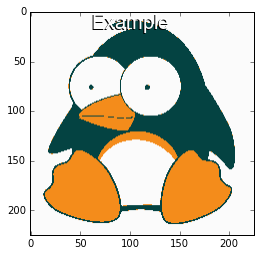

In [14]:
display(Image(filename='./wm_cartoon_repro.png'))

# Clustering of digits data using GMM

For the next problem you will use GMM (scikit-learn version) to cluster the digits data in the scikit-learn library. 

## Load the digit datasets

The datasets are loaded into a dictionary.

In [3]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

print (number_digits)

10


## Inspect the different digit  images

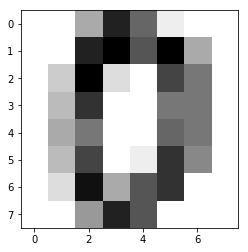

In [5]:
def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cm.binary)   
    
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 


## GMM

Next, fit the data to a 10 component GMM model, using the scikit-learn package.

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

In [6]:
data = digits.data

np.random.seed(1)
# Insert GMM code
gmm = GMM(n_components=10)
gmm.fit(data)
gmm_means = gmm.means_

C:\Users\Shane\Documents\Downloads\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Shane\Documents\Downloads\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Shane\Documents\Downloads\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be

In [7]:
def plot_digits(digits, title):
    # Figure size in inches
    fig = plt.figure(figsize=(10, 4))

    # Add title
    fig.suptitle(title, fontsize=14, fontweight='bold')

    # For all labels (0-9)
    for i in range(10):
        # Initialize subplots in a grid of 2X5, at i+1th position
        ax = fig.add_subplot(2, 5, 1 + i)
        # Get dimension
        d = np.sqrt(digits[i].shape[0])
        # Display images
        ax.imshow(digits[i].reshape((d, d)), cmap=plt.cm.binary)
        # Don't show the axes
        plt.axis('off')

    # Show the plot
    plt.show()

C:\Users\Shane\Documents\Downloads\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


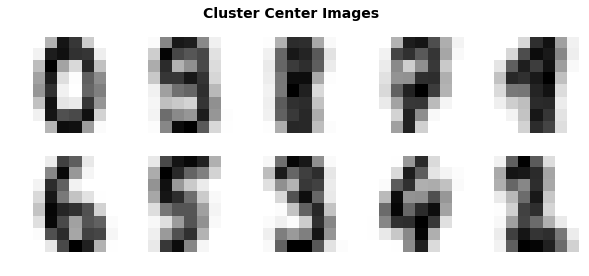

In [8]:
plot_digits(gmm_means, 'Cluster Center Images')

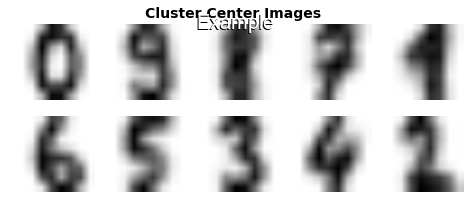

In [9]:
display(Image(filename='./wm_GMM.png'))

## Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal

In [10]:
# function that returns generated samples
def gen_samples(mean, covar):
    samples = [sc.stats.multivariate_normal.rvs(mean=mean[i],cov=covar[i])
        for i in np.arange(10)
    ]
    return samples

In [11]:
gmm_covars = gmm.covars_
samples = gen_samples(gmm_means, gmm_covars)

C:\Users\Shane\Documents\Downloads\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


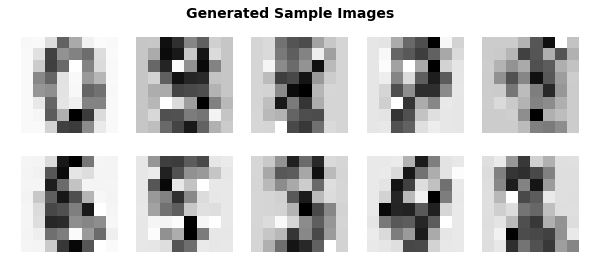

In [12]:
plot_digits(samples, 'Generated Sample Images')